# Théorie de Press-Schechter et éffondrement a symétrie sphérique en cosmologie
------------------------------------------------------------------------------

Après avoir étudié les perturbations cosmologiques dans l'Univers primordial et simuler le CMB, je propose ici, d'étudier (très sommairement) ce qui se passe après l'ère du fond diffus cosmologique : La formation des grandes structures. 

Dans le cadre du modèle standard de la cosmologie, les surdensités primordiales sont amplifiées par la gravité. Elles s’effondrent donc pour former des halos de matière noire, au sein desquels le gaz tombe pour former les galaxies. Pourvoir quantifier l'effondrement de ces surdensités primordiales permet donc dans le principe de connaitre le rythme de formation des galaxies et amas de galaxies ainsi que leurs abondances. Nous effectuerons les calculs dans le cadre d’hypothèses simplifiées (effondrement sphérique, cosmologie EdS...).

On considère une sphère homogène (densité de masse $\rho$ = $\frac{M}{V}$ avec M sa masse, V = $\frac{4}{3} \pi R^{3}$ le volume et R le rayon) dans un univers homogène (densité de masse $\rho_{m}$) en expansion. On définit la surdensité de la sphère par rapport au reste de l’univers comme $\delta$ = $\frac{\rho-\rho_{m}}{\rho_{m}}$ : si la sphère est plus dense que le reste de l’univers alors δ > 0 et la surdensité va s’effondrer.
L’évolution temporelle de $\delta$ peut être déterminé en partant des équations hydrodynamiques basiques en cosmologie (facteur d'expansion a), il s'agit des équations suivantes : 

\begin{equation}\label{hydro}
    \begin{cases}
       \frac{\partial \rho_{i}}{\partial t} + a^{-1} \nabla.\left(\rho_{i} u_{i}\right) = 0  \\
       \frac{\partial u_{i}}{\partial t} + a^{-1} \left(u_{i}.\nabla\right) u_{i} + H u_{i} = -a^{-1} \frac{\nabla P_{i}}{\rho_{i}} -  a^{-1} \nabla \phi \\
       a^{-2} \nabla^{2} \phi = 4 \pi G \left(\rho_{m}-\bar{\rho_{m}}\right)\\
    \end{cases}
\end{equation}


Les deux premières équations correspondent à l'équation de continuité et l'équation d'Euler. La dernière équation est simplement l'équation de Poisson de la gravité Newtonienne. Dans la suite, on va surtout s'intéresser à la matière noire puisqu'elle s'effondre en premier, elle n'intéragit pas avec les autres composantes, on peut donc supprimer le gradient de pression $\nabla P_{i}$. 
On va maintenant définir la perturbation de la densité en introduisant une surdensité $\delta_{i}$ qui vient perturber le champ $\rho_{i}$ : 

\begin{equation}
   \rho_{i} = \bar{\rho_{i}} + \bar{\rho_{i}} \delta_{i} =  \bar{\rho_{i}} \left(1+\delta_{i}\right)    
\end{equation}

En réinjectant $\rho_{i}$ dans le système, en considérant la symétrie sphérique, et en considérant le fluide de matière noire, nous obtenons l'équation d'évolution non-linéaire de la surdensité : 

\begin{equation}
   \ddot \delta + 2 H \dot \delta = 4 \pi G \bar\rho_{m} (1+\delta) + \frac{4}{3} \frac{\dot \delta^{2}}{1+\delta}
\end{equation}

# Résolution Numérique : 
On se place dans le cadre de la cosmologie EdS ($\Omega_{m} = 1$) la fonction d'Hubble est alors une simple fonction du temps et s'écrit $H(t) = \frac{2}{3 t}$ et le facteur d'échelle s'écrit $a(t) = \large(\frac{3 H_{0} t }{2}\large)^{\frac{2}{3}}$. 
La densité moyenne s'écrit : $\bar\rho_{m} = \rho_{c} a^{-3}$ où $\rho_{c} = \frac{3 H_{0}^{2}}{8 \pi G}$ est la densité critique. On peut maintenant calculer H(t) et $\bar\rho_{m}(t)$ comme de simple fonction du temps puis utiliser Odeint pour résoudre l'équation. 

On part d’une surdensité initiale $\delta_{i} << 1$ à un temps $t_{i} << \frac{1}{H_{0}}$ fixé et en supposant comme condition sur la dérivée $\dot \delta_{i} = H(t_{i}) \delta_{i}$ jusqu’à une surdensité finale importante ($\delta_{f} >> 100$) où l’on considère que la sphère s’est effondrée (correspondant à $\delta \longrightarrow +\infty$ ce qui numériquement n’est pas possible)

 




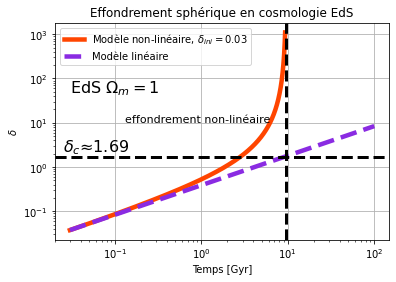

In [82]:
import numpy as np
import matplotlib.pyplot as plt 
import scipy.integrate 
from scipy import optimize




H0=2.2685455027664497e-18     # s^-1 
G=6.67e-11                    # SI




def solu_non_linéaire(j,t,G):

    r,y=j
    r_derive=(-4/(3*t))*r+(2/(3*t**2))*y*(1+y)+4*r**2/(3*(1+y))
    y_derive=r
    res=np.array([r_derive,y_derive])
    return(res)
t=np.linspace(0.03,9.312280649478943,100000)
y0=0.01/(0.2665)
r0=(2/(3*0.03))*0.01/(0.2665)
j0=np.array([r0,y0])
solu=scipy.integrate.odeint(solu_non_linéaire,j0,t,args=(G,))
r_derive,y_derive=solu.T
plt.xscale('log')
plt.yscale('log')
plt.plot(t,y_derive , label="Modèle non-linéaire, $\delta_{ini} = 0.03$", color='orangered',linewidth=4.5) 

def solu_linéaire(j,t,G):

    r,y=j
    r_derive=(-4/(3*t))*r+(2/(3*t**2))*y
    yy_derive=r
    res=np.array([r_derive,yy_derive])
    return(res)
t=np.linspace(0.03,100.312280649478943,100000)
y0=0.01/(0.2665)
r0=(2/(3*0.03))*y0
j0=np.array([r0,y0])
solu=scipy.integrate.odeint(solu_linéaire,j0,t,args=(G,))
r_derive,yy_derive=solu.T
plt.xscale('log')
plt.yscale('log')
plt.plot(t,yy_derive , '--', label="Modèle linéaire", color='blueviolet',linewidth=4.5) 
plt.grid()
plt.legend()
plt.axvline(x=9.6,linestyle ='--',color = 'black',linewidth=3)
plt.axhline(y=1.69,linestyle ='--',color = 'black',linewidth=3)
plt.text(0.90,12,"effondrement non-linéaire",horizontalalignment = 'center', verticalalignment = 'center',color = 'black',fontsize = 11)
#plt.annotate("effondrement non-linéaire", xy=(10,1.7),xytext = (0.12,12),arrowprops=dict(facecolor='black',shrink=0.07))
plt.text(0.600e-1,2.8,"$\delta_{c} ≈ 1.69$",horizontalalignment = 'center', verticalalignment = 'center',color = 'black',fontsize = 16)
plt.xlabel("Temps [Gyr]")
plt.ylabel("$\delta$")
plt.text(1e-1,0.6e2,"EdS $\Omega_{m} = 1 $",horizontalalignment = 'center', verticalalignment = 'center',color = 'black',fontsize = 16)

plt.title("Effondrement sphérique en cosmologie EdS")











plt.show()


# Analyse : La surdensité critique $\delta_{c}$ une quantité clé.  
-----------

On observe que la solution non-linéaire "explose" complètement, en effet, dans l'équation non-linéaire qui régit l'évolution de la surdensité, ces termes sont une source d'amplification de l'effondrement. 

Cependant, pourquoi tracer la solution linéaire ? :

Tout simplement car souvent en cosmologie, on essaie de faire le pont entre cette solution non-linéaire un peu compliquée et non résoluble analytiquement, et la solution (plus simple et souvent analytique) de l’équation linéarisée. 
Et ce pont est justement la valeur de la surdensité critique au moment de l'effondrement dans le régime linéaire, on peut l'écrire ainsi :  $\delta_{c} = \delta_{lineaire}(t_{eff})$ où, dans notre cas présent (i.e pour notre jeu de condition initiale) $t_{eff} \approx 9.6$ Gyr. 

Ainsi, on trouve $\delta_{c} \approx 1.69$ qui est compatible avec la valeur attendu ($\delta_{c} = 1.686$). 
Il est important de comprendre que cette valeur de la surdensité critique est vraiment ce que l'on pourrait appeler "une constante de la cosmologie". En effet, cette valeur est quasiment indépendante de la masse,des conditions initiales d'effondrements, et ne dépend que très peu de la cosmologie considérée. 

Cette valeur de la surdensité critique $\delta_{c}$ permet de faire le pont entre la solution non-linéaire complexe et la solution linéaire simple. Si l’évolution linéaire prédit que la surdensité vaut $\delta_{lineaire} = \delta_{c}$ alors on sait que le calcul non-linéaire aurait prédit une densité infinie, c’est à dire que la galaxie ou l’amas ce serait formé. Cette grandeur est la quantité clé qui entre dans les calculs analytiques pour prédire l’abondance des galaxies et amas de galaxies dans l’univers (modèle de Press-Schechter). Nous verrons cela dans la suite du notebook jupyter. 

# Surdensité du Viriel : un cas réaliste d'effondrement : 
----------------------------------------------------------

Un effondrement $\delta \longrightarrow +\infty$ n'est évidemment pas réaliste. En réalité, la sphère de matière qui s'éffondre va atteindre un état d'équilibre pour une certaine valeur de la surdensité : la surdensité du viriel. 

Pour calculer cette surdensité, on peut utiliser une approche purement théorique qui repose sur la symétrie sphérique de l'effondrement, ce n'est pas très difficile et assez rapide (pour un effondrement sphérique, la surdensité du viriel est constante et vaut $\delta_{Vir}$ = 178.) cependant, nous allons tenter de retrouver cette valeur numériquement... 

On cherche donc l'évolution du rayon de la sphère de matière : 
Comme $M$ = $\rho V$ = $\frac{4}{3} \rho \pi r^{3}$ alors $r(t)$ = $\Large(\frac{3 M}{4 \pi \rho_{m} (1+\delta(t))}\Large)^{\frac{1}{3}}$. 

Ainsi, en exprimant $\rho_{m}$ en fonction du temps et en implémentant l'évolution de $\delta$ calculé auparavant, on peut tracer l'évolution du rayon d'un halo de matière qui s'effondre dans un Univers en expansion. 

Comme indiqué dans l'expréssion précédante, r(t) dépend de M. Calculerons l'évolution du rayon pour une masse finale d'environ $10^{14}.M_{Soleil}$, ceci équivaut à la masse d'un amas de galaxies. 

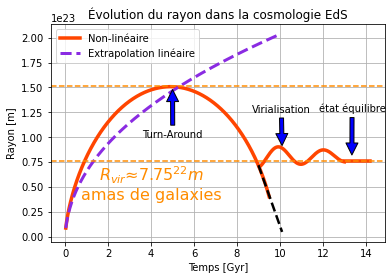

179.90499720605916


In [71]:



M=4.20e14*1.989e+30  # Masse d'une centaines de galaxies
def Rayon(t):
    return (4.5*2.10489111e23*M*(t**2)/((1+y_derive)))**(1/3)
t=np.linspace(0.03,9.5,100000)

#plt.annotate('Turn-Around', xy=(7.2,8.5e+22),xytext = (11,8.6e+22),arrowprops=dict(facecolor='red', shrink=0.05) )
plt.plot(t,Rayon(t),color='orangered',label = 'Non-linéaire',linewidth=3.5)
plt.title("Évolution du rayon dans la cosmologie EdS")
plt.xlabel("Temps [Gyr]")
plt.ylabel("Rayon [m]")
plt.grid()


def RayonLin(t):
    return (4.5*2.10489111e23*M*(t**2)/((1+yy_derive)))**(1/3)
t=np.linspace(0.03,10,100000)

#plt.annotate('Turn-Around', xy=(7.2,8.5e+22),xytext = (11,8.6e+22),arrowprops=dict(facecolor='red', shrink=0.05) )
plt.plot(t,RayonLin(t), '--',color='blueviolet',label ='Extrapolation linéaire',linewidth=3)
plt.legend()

def Ray(t):
    return np.sin(-3*t)*9.5e+23/t**2+0.8075e23 
t=np.linspace(9.05,13,1000)
plt.plot(t,Ray(t), color="orangered",linewidth=3.5 )
plt.annotate('Virialisation', xy=(10.10,0.90e+23 ),xytext = (8.70,1.25e23),arrowprops=dict(facecolor='blue', shrink=0.05) )
plt.annotate('état équilibre', xy=(13.35,0.80e+23 ),xytext = (11.8,1.26e23),arrowprops=dict(facecolor='blue', shrink=0.05) )
plt.annotate('Turn-Around', xy=(5,1.5e+23 ),xytext = (3.6,1e23),arrowprops=dict(facecolor='blue', shrink=0.05) )
def p(t):
    
    return 0.7575e23 
t=np.linspace(13,14.2,1000)
plt.plot(t,np.full(t.shape, p(t)), color='orangered',linewidth=3.5 )

# lightcoral dodgerblue
plt.axhline(y=1.514e23,linestyle ='--',color = 'darkorange',linewidth=1.5)

plt.axhline(y=0.7575e23,linestyle ='--',color = 'darkorange',linewidth=1.5)
#plt.axvline(x=8.9,linestyle ='--',color = 'darkorange',linewidth=1.5)

def droite(u):
    return -0.609e23*u+6.20e23
u = np.linspace(9,10.1,10000)
plt.plot(u,droite(u), '--',c = 'black',linewidth= 2.5)
plt.text(4,0.62e23,"$R_{vir} ≈ 7.75^{22}m$",horizontalalignment = 'center', verticalalignment = 'center',color = 'darkorange',fontsize = 16)
plt.text(4,0.42e23,"amas de galaxies",horizontalalignment = 'center', verticalalignment = 'center',color = 'darkorange',fontsize = 16)
plt.show() 



tvir = 2.80e17              # s 
rvir = 0.7575e23            # m 
deltaVir = ((18*G*M*tvir**(2))/rvir**(3))-1
print(deltaVir)   # deltaVir = 179 Ok !!



# Analyse 

# Théorie de Press-Schechter : Une sonde cosmologique
-----------------------------------------------------


0.00035454645939216425
18938808800736.336
169532753588.238


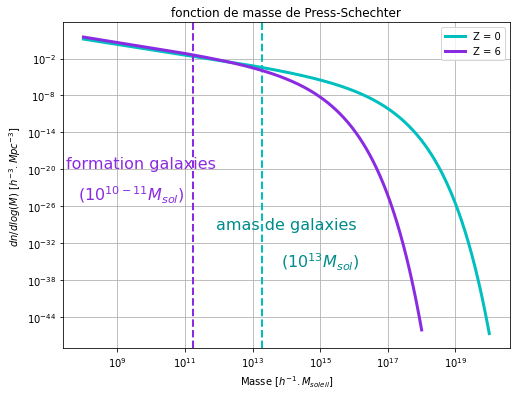

In [69]:
pco = 2.775e11           # densité critique exprimée en Mpc
om = 0.3                 # proportion de matière           
pi2 = np.sqrt(2/np.pi)
a = pco*om*pi2
sigma8 = 0.8             # écart-type des fluctuations, échelle de 8 Mpc
deltac = 1.69            # surdesnité critique calculée plus haut
R8 = 8              
M8 = (om*pco*4*np.pi*R8**(3))/(3)

n = -2                   # indice spectral du spectre de puissance 

plt.figure(figsize=(8,6))

Mstar = M8*(sigma8/deltac)**(3/(n+3))

def dn(M):
    return (np.exp(-0.5*(M/Mstar)**((n+3)/3))*a*((n+3)/6)*(M/Mstar)**((n+3)/6))/M
M = np.linspace(1e8,1e20,10000000)
plt.xscale('log')
plt.yscale('log')

plt.plot(M,dn(M),color = 'c',linewidth=3,label = 'Z = 0')

plt.title("fonction de masse de Press-Schechter")
plt.xlabel("Masse [$h^{-1}.M_{soleil}$]")
plt.ylabel("$dn/dlog(M)$ [$h^{-3}.Mpc^{-3}$]")
plt.axvline(x=18938808800736.336,linestyle ='--',color = 'c',linewidth=2)
plt.axvline(x=169532753588.238,linestyle ='--',color = 'blueviolet',linewidth=2)

M8z = (om*pco*4*np.pi*R8**(3))/(3*7**(3))
Mstarz = M8z*(sigma8/deltac)**(3/n+3)

def dn1(M):
    return (np.exp(-0.5*(M/Mstarz)**((n+3)/3))*a*((n+3)/6)*(M/Mstarz)**((n+3)/6))/M
M = np.linspace(1e8,1e18,10000000)
plt.xscale('log')
plt.yscale('log')
plt.grid()
plt.plot(M,dn1(M),color = 'blueviolet',linewidth=3,label = 'Z = 6')
plt.legend(loc = 'best')


plt.text(10e13,10e-30,"amas de galaxies",horizontalalignment = 'center', verticalalignment = 'center',color = 'darkcyan',fontsize = 16)
plt.text(10e14,10e-36,"($10^{13} M_{sol}$)",horizontalalignment = 'center', verticalalignment = 'center',color = 'darkcyan',fontsize = 16)

plt.text(50e8,10e-20,"formation galaxies",horizontalalignment = 'center', verticalalignment = 'center',color = 'blueviolet',fontsize = 16)
plt.text(25e8,10e-25,"($10^{10-11} M_{sol}$)",horizontalalignment = 'center', verticalalignment = 'center',color = 'blueviolet',fontsize = 16)




print(dn(Mstar))   # 3.5E-4
print(Mstar)
print(Mstarz)